In [2]:
import pandas as pd
df = pd.read_csv("placement.csv")
df

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
...,...,...
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96


In [3]:
X= df.iloc[:,0:1]
y =df.iloc[:,-1]
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state=2)


In [5]:
X_train

,cgpa
137,7.14
163,8.93
111,5.42
123,5.10
109,7.77
...,...
43,7.66
22,6.14
72,7.78
15,7.25


In [71]:
import numpy as np
predictions = []
def predict(data,w,b):
    prediction =[w*x+b for x in data['cgpa']]
    predictions = np.array(prediction)
    return prediction


def improve(cost,w,b):
    lr=0.001
    for i in range(1000):
        #decrease value of w and b if cost is negative else increase both
        w += lr*cost
        b += lr*cost
        
        prediction =predict(X_train,w,b)
        cost  = calculate_cost(y_train,prediction)
    return (cost,w,b)
    
def calculate_cost(ya,yp):
    error = [ya-yp for ya,yp in zip(ya,yp)]
    cost = sum(error)/len(ya)
    return cost
def fit_model(X_train,y_train,w,b):
    
    prediction = predict(X_train,w,b)
    cost  = calculate_cost(y_train,prediction)
    print(cost) 
    cost,w,b = improve(cost,w,b)
    prediction =predict(X_test,w,b)
    cost  = calculate_cost(y_train,prediction)
    print(prediction)
    print(cost,w,b)



fit_model(X_train,y_train,1,0)

    


TypeError: array() missing required argument 'object' (pos 0)

# cost is negative (-3.9859) when w=1,b=0
# cost is negative (-5.3839875) when w=1.2,b=0
# cost is negative (-5.8839875) when w=1.2,b=0.5
# conclusion so by increasing value of w and b error increased in negative side , move toward negative side
# cost is posiutive (1.10595) when w=0.2,b=0.5
# cost is positive (1.40595) when w=0.2,b=0.2
# conclusion by decreasing value of w and b the error moved towards positive side /


ValueError: x and y must have same first dimension, but have shapes (40, 1) and (0,)

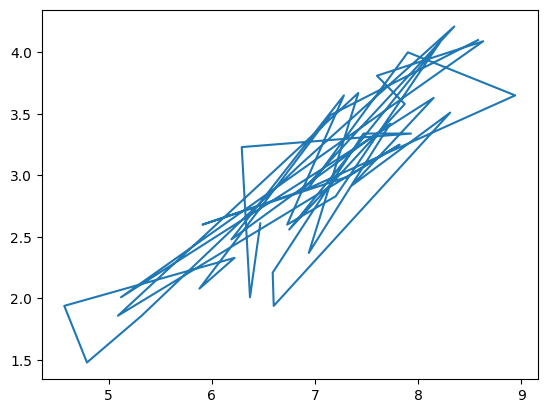

In [76]:
import matplotlib.pyplot as plt
plt.plot(X_test,y_test)
plt.plot(X_test,predictions)